
<p>
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />
</p>

## GeostatsPy: Basic Univariate Statistics and Distribution Representativity for Subsurface Data Analytics in Python

Demonstration workflow with hands-on experiential learning for calculating representative distribution for subsurface modeling.




### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### PGE 383 Exercise: Basic Univariate Summary Statistics and 
### Representativity with Cell-based Declustering in Python with GeostatsPy

Here's a simple workflow for correcting for sampling representativity. This should help you get started data declustering to address spatial sampling bias.

First, let's motivate this workflow and provide context by discussing... 

#### Geostatistical Sampling Representativity

In general, we should assume that all spatial data that we work with is **biased**. 

... why is that?  In general, how do we **collect subsurface data**?


#### Source of Spatial Sampling Bias

Data is collected to **answer questions**:

* how far does the contaminant plume extend? – sample peripheries
* where is the fault? – drill based on seismic interpretation
* what is the highest mineral grade? – sample the best part
* who far does the reservoir extend? – offset drilling

and to **maximize value** directly:

* maximize production rates


#### Sampling for Representativity

These are our options for representative sampling:

**Random Sampling**: when every item in the population has a equal chance of being chosen. Selection of every item is independent of every other selection.
Is random sampling sufficient for subsurface?  Is it available?
* it is not usually available, would not be economic
* data is collected answer questions
    * how large is the reservoir, what is the thickest part of the reservoir 
* and wells are located to maximize future production
    * dual purpose appraisal and injection / production wells!

**Regular Sampling**: when samples are taken at regular intervals (equally spaced).  
* less reliable than random sampling
* Warning: may resonate with some unsuspected environmental variable

#### Our Subsurface Data

So if we were **designing our subsurface sampling for representativity** of the sample set and resulting sample statistics, by theory we have 2 options, random sampling and regular sampling.

* What would happen if you proposed random sampling in the Gulf of Mexico at $150M per well?

We should **not change current sampling strategy** as it results in best economics, instead we should address sampling bias in the data.

What do we have?

* we usually have biased, opportunity sampling 
* we must account for bias 

Never use raw spatial data without access sampling bias / correcting.


#### Mitigating Sampling Bias

In this demonstration we will take a biased spatial sample data set and apply declustering using **GeostatsPy** functionality.

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I to provide **hands-on experience** with **building subsurface modeling workflows**. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to **remove the hurdles of subsurface modeling workflow construction** by providing building blocks and sufficient examples and demonstrations. 

This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

* **Install Python and Jupyter with Anaconda 3** on your machine (https://www.anaconda.com/download/). 

* **Install the GeostatsPy package** (that's my package for data analytics and geostatistics in Python.

    * From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
    * In the terminal type: pip install geostatspy or add this to the workflow:

```python  
# Install a pip package in the current Jupyter kernel 
# Code from https://jakevdp.github.io
import sys
!{sys.executable} -m pip install numpy
```


* **Import GeostatsPy** to your workflow with the import command in your workflow. This makes GeostatsPy functionality available in your workflow. 

```python
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats
```

* **Get the Data**  You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

    * You will need to copy the data file to your working directory.  The file is available here:

    Tabular data - sample_data_biased.csv at https://git.io/fh0CW

### Univariate Summary Statistics and Data Distribution Representativity with Cell-based Declustering in Python with GeostatsPy

#### Declustering Workflow: Initial Setup

We will need to:

* import the *GeostatsPy* package so we can use the functionality in our workflow
* set the working directing with our data set 
* load the data

In [7]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization
import geostatspy.geostats as geostats    # GSLIB methods converted to Python        

We will also need some standard packages. 

* These should have been installed with Anaconda 3.

In [26]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

#### Set the working directory

I always like to do this:

* so I don't lose files 
* to simplify subsequent read and writes (avoid including the full address each time)
* to work with a variety of directories in a single workflow

In [9]:
os.chdir("c:/PGE383")             # set the working directory

#### Loading the Tabular Data Set

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

* is is a 2D multivariate dataset 
* remember it is here https://git.io/fh0CW

In [10]:
df = pd.read_csv('sample_data_biased.csv')     # load our data table (wrong name!)

No error, so it worked, we loaded our file into our pandas DataFrame called 'df'. 

#### Declustering Workflow: Data Analysis

But how do you really know that it worked? 

* Visualizing the DataFrame would be useful and we already covered these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by:

* printing a slice 
    * we could look at any subset of the data table
* by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 
    * preview any number of the first rows (parameter 'n' to set number of rows)



In [11]:
df.head(n=13)                           # preview the DataFrame

,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
5,200,800,1,0.154648,106.491795
6,200,700,1,0.153113,140.976324
7,200,500,1,0.126167,12.548074
8,200,400,0,0.094750,1.208561
9,200,100,1,0.150961,44.687430


#### Summary Statistics for Tabular Data

The data table includes: 

* X and Y coordinates (meters)
* Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone)
* Porosity (fraction)
* Permeability as 'Perm' (mDarcy) 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The **describe** command provides:

    * count
    * mean
    * minimum and maximum
    * quartiles 
    
 all in a nice data table. 

We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.000000,990.000000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.000000,999.000000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.154220,0.228790
Perm,289.0,207.832368,559.359350,0.075819,3.634086,14.908970,71.454424,5308.842566


#### Declustering Workflow: Spatial Context

Let's set the **extents** over X and Y coordinates.  

It is natural to set the x and y coordinate and feature ranges manually. 

* e.g. do you want your color bar to go from 0.05887 to 0.24230 exactly? 

We will assume a study area of 0 to 1,000m in x and y and omit any data outside this area.

Also, let's pick a **color map** for display. 

* I heard that plasma is known to be friendly to the color blind as the color and intensity vary together (hope I got that right, it was an interesting Twitter conversation started by Matt Hall from Agile if I recall correctly). 

So this is our code:

In [13]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.05; pormax = 0.25;           # range of porosity values
cmap = plt.cm.plasma                    # color map

##### Visualizing Tabular Data with Location Maps

For plotting a **location map** let's try out locmap from GeostatsPy. 

* This is a reimplementation of GSLIB's locmap program that uses matplotlib and GSLIB-like parameters.

* I hope you find it simpler than matplotlib, if you want to get more advanced and build custom plots look at the source. 

To see the parameters, just type the command name:

In [14]:
GSLIB.locmap

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

GeostatsPY.GSLIB.locmap parameters:

* df       - pandas DataFrame with data and then x,y and variable / feature column
* xcol
* ycol
* vcol
* xmin     - plotting extends in x and y coordinate
* xmax
* ymin
* ymax
* vmin     - variable / feature minimum and maximum for color bar
* vmax
* title    - plot labels for title, x and y axis
* xlabel
* ylabel
* vlabel
* cmap     - color map 
* fig_name - name of high resolution tiff image

Now we can populate the plotting parameters and visualize the porosity data.

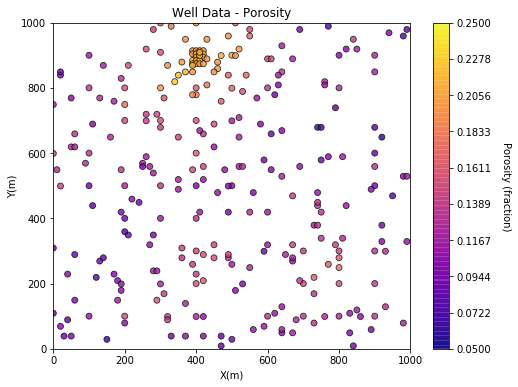

In [15]:
GSLIB.locmap(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap,'locmap_Porosity')

##### Ocular Inspection

**Spatial Sampling Bias**

Look carefully, and you'll notice the the spatial samples are more dense in the high porosity regions and lower in the low porosity regions.  

* There is preferential sampling.  

* We cannot use the naive statistics to represent this region.  

* We have to correct for the clustering of the samples in the high porosity regions. 


#### Declustering Workflow: Cell-based Declustering

Let's demonstrate **cell-based declustering**. 

We add some initial interpretations:

* We will want to **minimize the declustering mean** 

* Cell size between **100 - 200m** is likely a good cell size, 

These interpretations are *ocular estimate* based on:

* Greater sample density in the high values

* Largest average spacing in the sparsely sampled regions   

Let's check out the declus program reimplimented from GSLIB.

* to see the parameters run the program without parameters:

In [16]:
geostats.declus

<function geostatspy.geostats.declus(df, xcol, ycol, vcol, iminmax, noff, ncell, cmin, cmax)>

##### GeostatsPy Declustering Parameters

GeostatsPY.geostats.declus parameters:

* df       - pandas DataFrame with data and then x,y and variable / feature column
* xcol
* ycol
* vcol
* iminmax  - 1 - minimize the declustering mean, 0 - maximize the declustering mean
* noff     - number of origin offsets
* ncell    - number of cells sizes with a minimun and maximum
* cmin
* cmax    

Now we can populate the declustering parameters and analyze the declustering results.

##### Selecting Cell-based Declustering Parameters

We can now populate the parameters. 

* Wide range of cell sizes, from 10m to 2,000m ('cmin' and 'cmax') 
* Take the cell size that minimizes the declustered mean ('iminmax' = 1 minimize). 
* Multiple offsets (number of these is 'noff') uses multiple grid origins and averages the results to remove sensitivity to grid position.  
* The ncell is the number of cell sizes.

The output from this program is:

* wts - an array with the weights for each data (sum to the number of data, 1 indicates nominal weight)
* cell_sizes - an array with the considered cell sizes
* dmeans - an array with the declustered mean for each cell size 

In [17]:
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts'] = wts                            # add weights to the DataFrame
df.head()                                  # preview the DataFrame

There are 289 data with:
   mean of      0.13474387540138408 
   min and max  0.058547873 and 0.228790002
   standard dev 0.03767982164385207 


,X,Y,Facies,Porosity,Perm,Wts
0,100,900,1,0.115359,5.736104,3.064286
1,100,800,1,0.136425,17.211462,1.076608
2,100,600,1,0.135810,43.724752,0.997239
3,100,500,0,0.094414,1.609942,1.165119
4,100,100,0,0.113049,10.886001,1.224164


##### The Declustering Weights

Let's look at the location map of the weights.

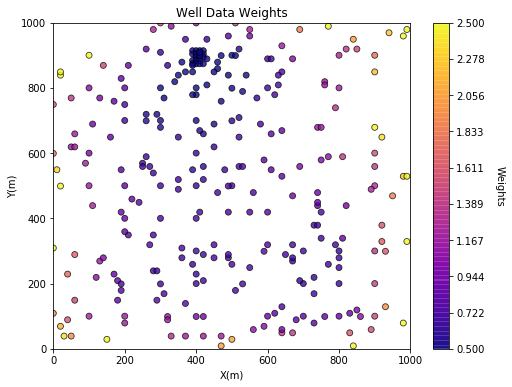

In [18]:
GSLIB.locmap(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.5,2.5,'Well Data Weights','X(m)','Y(m)','Weights',cmap,'locmap_Weights')

##### The Declustering Weights

Do they look correct?  See that the weights vary with local sampling density?  

Now let's calculate the: 

* the location map and distribution of the weights
* the naive and declustered porosity distributions. 

You should see the histogram bars adjusted by the weights. 

In the next code blocks we calculate all of these plots.

##### The Declustering Weights

Let's look at the location map and distribution of the weights.

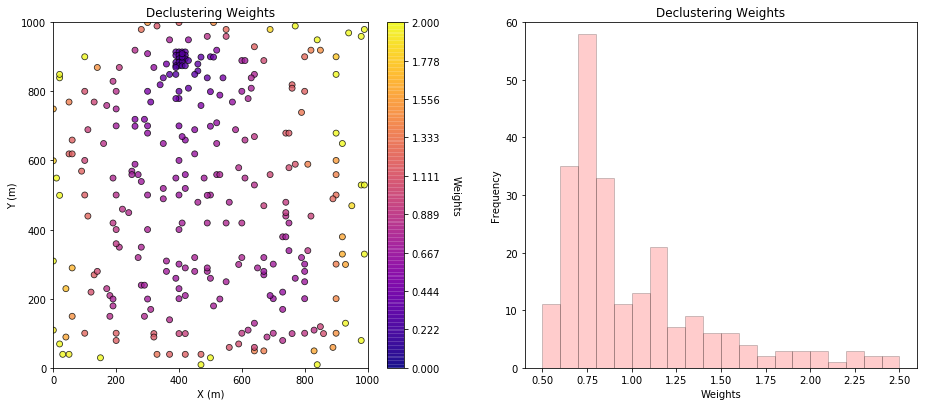

In [20]:
plt.subplot(121)
GSLIB.locmap_st(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.0,2.0,'Declustering Weights','X (m)','Y (m)','Weights',cmap)

plt.subplot(122)
GSLIB.hist_st(df['Wts'],0.5,2.5,log=False,cumul=False,bins=20,weights=None,xlabel="Weights",title="Declustering Weights")
plt.ylim(0.0,60)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

##### The Declustered Distribution

Let's look at the naive and the declustered porosity histograms.

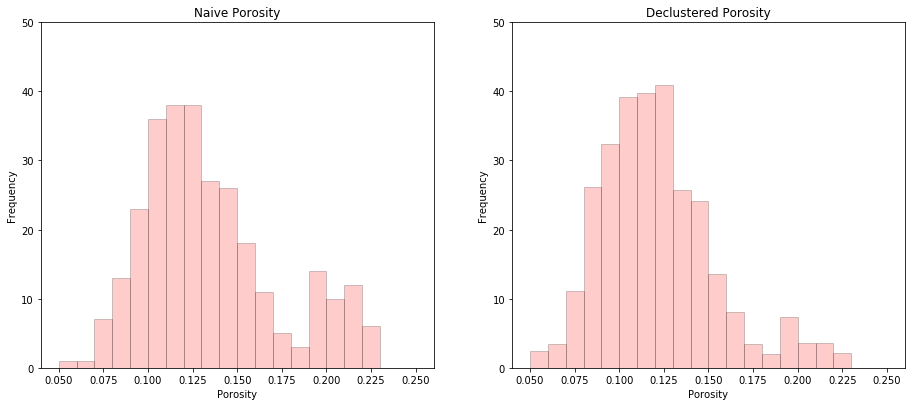

Porosity naive mean is 0.135.
Porosity declustered mean is 0.121.
Correction of 0.1002.


In [27]:
plt.subplot(121)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity",title="Naive Porosity"); plt.ylim(0.0,50)
plt.subplot(122)
GSLIB.hist_st(df['Porosity'],0.05,0.25,log=False,cumul=False,bins=20,weights=df['Wts'],xlabel="Porosity",title="Declustered Porosity"); plt.ylim(0.0,50)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

##### The Declustered Summary Statistics

Let's compare the naive and the declustered porosity summary statistics.

* We can calculate any statistic with weights

In [31]:
por_mean = np.average(df['Porosity'].values); por_dmean = np.average(df['Porosity'].values,weights=df['Wts'].values)

print('Porosity naive mean is ' + str(round(por_mean,3))+'.'); print('Porosity declustered mean is ' + str(round(por_dmean,3))+'.')
cor = (por_mean-por_dmean)/por_mean; print('Correction of ' + str(round(cor,4)) +'.')

Porosity naive mean is 0.135.
Porosity declustered mean is 0.121.
Correction of 0.1002.


##### Analysis of Declustering Cell Size

Now let's look at the plot of the declustered porosity mean vs. the declustering cell size.

* over the 100 different cell sizes
* results averaged over 10 origin offsets 

Note that for very small and very large cell size:

* the **declustered mean is the naive mean** 

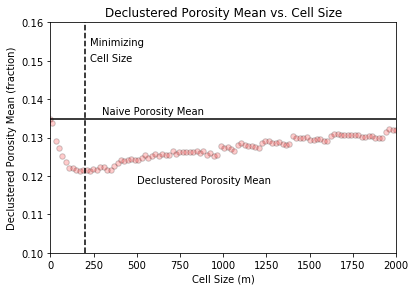

In [30]:
plt.subplot(111)
plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.2, edgecolors = "black", facecolors = 'red')
plt.xlabel('Cell Size (m)'); plt.ylabel('Declustered Porosity Mean (fraction)')
plt.title('Declustered Porosity Mean vs. Cell Size')
plt.plot([0,2000],[por_mean,por_mean],color = 'black'); plt.plot([200,200],[0.10,0.16],color = 'black',linestyle='dashed')
plt.text(300., 0.136, r'Naive Porosity Mean'); plt.text(500., 0.118, r'Declustered Porosity Mean'); plt.text(230., 0.154, r'Minimizing'); plt.text(230., 0.150, r'Cell Size')
plt.ylim(0.10,0.16); plt.xlim(0,2000)
plt.subplots_adjust(left=0.0, bottom=0.0, right=.80, top=0.8, wspace=0.2, hspace=0.2)
plt.show()

The cell size that minimizes the declustered mean is about 200m (estimated from the figure). This makes sense given our previous observation of the data spacing. 

#### Comments

This was a basic demonstration of declustering to correct for sampling bias. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays and many other workflows availble at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy.

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


<p>
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />
</p>

#### The Author:

Michael Pyrcz, Associate Professor, University of Texas at Austin
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development.

For more about Michael check out these links:
#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you!

* Interested in collaboration:
    * supporting my graduate student research 
    * Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)
    
My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

Michael